<a href="https://colab.research.google.com/github/eunhobang/ICT-AI-education/blob/main/8_9_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #기본적인 수치계산
import pandas as pd
import seaborn as sns
#Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
#타이타닉 데이터 내장

In [4]:
titanic = sns.load_dataset('titanic')

## 정보탐색

* 결측치 수정 어떻게 처리할 것인지 중요

In [5]:
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- survived 생존여부(0사망)
- pclass	
- sex	
- age	
- sibsp	: 함께 탑승한 형제자매, 아내 남편수
- parch	: 함께 탑승한 부모, 자식의 수
- fare	
- embarked	: 배에 탑승한 위치
- class	
- who	
- adult_male	
- deck
- embark_town	
- alive	: 생존
- alone

In [6]:
titanic.describe() #수치 정보


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.dropna().describe() #누락된 값 제외하고 수치 정보 표시


,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


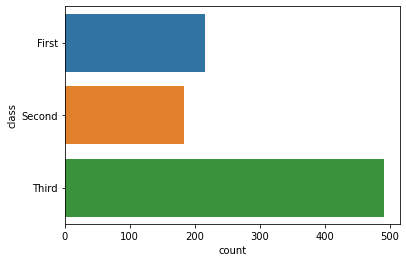

In [8]:
# 등급별
sns.countplot(y='class', data=titanic) #seaborn 시각화


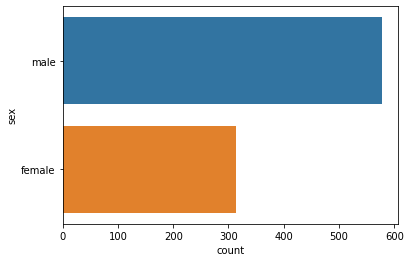

In [9]:
# 성별
sns.countplot(y='sex', data=titanic)

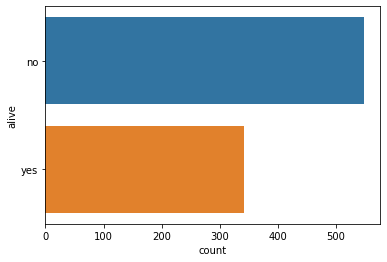

In [10]:
# 생존
sns.countplot(y='alive', data=titanic)

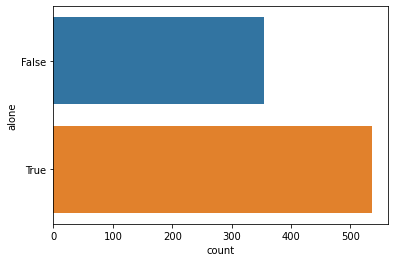

In [11]:
# 혼자유뮤
sns.countplot(y='alone', data=titanic)

In [13]:
# 생존자만
titanic.query("alive=='yes'")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [16]:
# 생존자 중에 class별로 묶기
titanic.query("alive=='yes'").groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


In [17]:
# class로 그룹 묶기
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


In [18]:
titanic.groupby('class')['fare'].median()
# class내에 'fare'라는 열 탐색

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

In [19]:
titanic.groupby('class')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
Second,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
Third,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [22]:
titanic.groupby(['class','sex'])['age'].mean().unstack() 
# unstack() 구조화 시켜주는 것
# 인덱스 값을 컬럼으로 올려줌

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [24]:
titanic.groupby(['class','sex'])['age'].mean()

class   sex   
First   female    34.611765
        male      41.281386
Second  female    28.722973
        male      30.740707
Third   female    21.750000
        male      26.507589
Name: age, dtype: float64

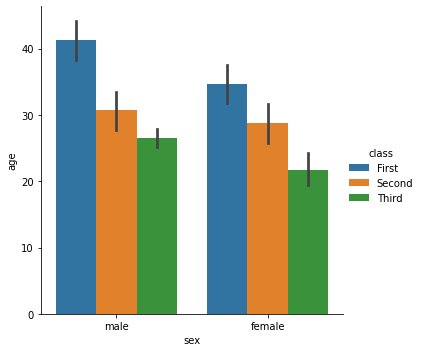

In [25]:
sns.catplot(x='sex',y='age',hue='class',kind='bar', data=titanic)
#hue 인수에 카테고리 값을 가지는 변수의 이름을 지정하면 카테고리 값에 따라 다르게 시각화
# 성별과 나이의 각각 클래스 확인

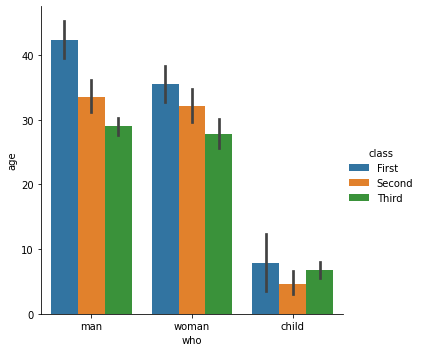

In [28]:
sns.catplot(x='who',y='age',hue='class',kind='bar', data=titanic)

# 캐글

In [29]:
from tensorflow.keras.models import load_model
import pandas as pd

In [30]:
kaggle_test = pd.read_csv('test.csv')

In [ ]:
kaggle_test

In [32]:
# 결측치가 모두 몇 개인지 확인
kaggle_test.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [33]:
# 학습셋과 동일하게 전처리
# 테스트셋의 속성은 학습셋과 동일한 상태로 변형되어야 해당 모델을 적용 가능
# 카테고리형 변수를 0과 1로 이루어진 변수로 변경
kaggle_test = pd.get_dummies(kaggle_test)
# get_dummies() :  변수들을 0과 1로 바꿈

In [36]:
# 결측치를 전체 컬럼의 편균으로 대체
kapple_test = kaggle_test.fillna(kaggle_test.mean())

In [37]:
df = kaggle_test
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


## 주택가격 예측하기
- 실제 데이터로 만들어 보는 모델
- 아이오와주 에임스 지역에서 2006년 2010년까지 거래된 실제 부동산 판매 기록

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### 데이터 준비

In [39]:
df = pd.read_csv('train.csv')
# 집 값 데이터

df = pd.get_dummies(df)
#카테고리형 변수를 0,1로 이루어진 변수로 교체

df = df.fillna(df.mean())
# 결측치를 전체 컬럼의 평균으로 대체

In [43]:
 #데이터 준비 완료

 df_corr = df.corr()
 # 데이터 사이의 상관관계를 저장

 df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)
 # 집 값과 관련이 큰 것부터 순서대로 저장

# 'OverallQual': 건물품질
# 'GrLivArea'
# 'GarageCars'
# 'GarageArea' : 크기
# 'TotalBsmtSF'


 cols_train = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
 X_train_pre = df[cols_train]
 # 집 값을 제외한 나머지 열 저장

 y = df ['SalePrice'].values
 # 집 값을 저장

 X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)
 # 전체 80%를 학습셋으로, 20%를 테스트셋으로 저장

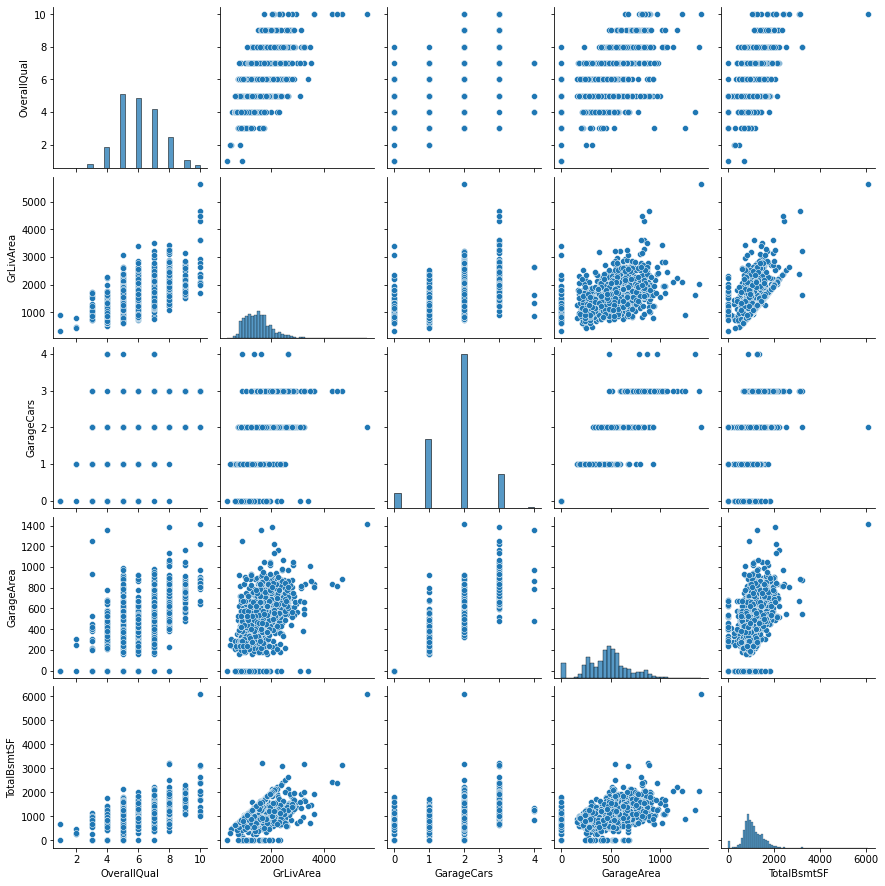

In [44]:
# 추출된 속성들과 집 값과 관련도를 시작적으로 확인
cols = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']

sns.pairplot(df[cols])
plt.show()

### 모델 구조

In [45]:
model = Sequential()
model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


In [48]:
# 모델 실행하기
model.compile(optimizer='adam', loss='mean_squared_error')

# 20번 이상 결과가 향상되지 않으면 자동으로 중단
early_stopping_callback = EarlyStopping(monitor='var_loss', patience=20)

# 모델 저장
modelpath = 'house.hdf5'

# 최적화 모델 업데이트
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose = 0, save_best_only= True)

# 실행 관련 설정 부분, 전체 20% 검증셋 설정
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 2000, batch_size = 32, callbacks = [early_stopping_callback, checkpointer])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
28/28 [==============================] - 0s 4ms/step - loss: 1935087616.0000 - val_loss: 3191208960.0000
Epoch 335/2000
28/28 [==============================] - 0s 4ms/step - loss: 1931238656.0000 - val_loss: 3138315776.0000
Epoch 336/2000
28/28 [==============================] - 0s 5ms/step - loss: 1929490176.0000 - val_loss: 3188999168.0000
Epoch 337/2000
28/28 [==============================] - 0s 5ms/step - loss: 1961119488.0000 - val_loss: 3146649600.0000
Epoch 338/2000
28/28 [==============================] - 0s 4ms/step - loss: 1948652800.0000 - val_loss: 3127537408.0000
Epoch 339/2000
28/28 [==============================] - 0s 4ms/step - loss: 1936778240.0000 - val_loss: 3167606528.0000
Epoch 340/2000
28/28 [==============================] - 0s 4ms/step - loss: 1939921408.0000 - val_loss: 3127039488.0000
Epoch 341/2000
28/28 [==============================] - 0s 4ms/step - loss: 1938104960.0000 - val_loss: 3162894080.0000
Epoch 342/2000
28/2

### 결과 시각화

In [49]:
# 예측 값, 실제 값, 실행 번호 시각화
# 25개 샘플로부터 얻은 결과로 채우기
real_prices = []
pred_prices = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()

for i in range(25):
  real = y_test[i]
  prediction = Y_prediction[i]
  print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
  real_prices.append(real)
  pred_prices.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

실제가격: 197900.00, 예상가격: 208337.56
실제가격: 257000.00, 예상가격: 264479.78
실제가격: 102000.00, 예상가격: 153454.62
실제가격: 110000.00, 예상가격: 212289.19
실제가격: 309000.00, 예상가격: 275014.09
실제가격: 115000.00, 예상가격: 138452.84
실제가격: 203000.00, 예상가격: 213216.67
실제가격: 135000.00, 예상가격: 221245.64
실제가격: 130000.00, 예상가격: 145582.62
실제가격: 90000.00, 예상가격: 226685.19
실제가격: 290000.00, 예상가격: 302523.97
실제가격: 164500.00, 예상가격: 196934.75
실제가격: 135900.00, 예상가격: 128535.62
실제가격: 361919.00, 예상가격: 282293.75
실제가격: 248328.00, 예상가격: 259133.00
실제가격: 240000.00, 예상가격: 240984.50
실제가격: 282922.00, 예상가격: 236845.89
실제가격: 140000.00, 예상가격: 120348.30
실제가격: 184000.00, 예상가격: 168197.56
실제가격: 209500.00, 예상가격: 242173.66
실제가격: 149900.00, 예상가격: 208896.27
실제가격: 220000.00, 예상가격: 200466.45
실제가격: 145000.00, 예상가격: 144506.75
실제가격: 137500.00, 예상가격: 143133.73
실제가격: 303477.00, 예상가격: 264376.06


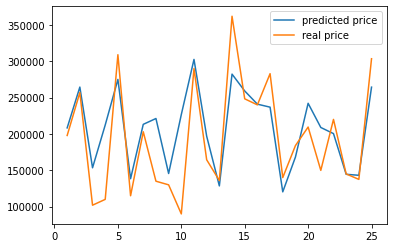

In [51]:
# 그래프를 통해서 샘플 비교
plt.plot(X_num, pred_prices, label = "predicted price")
plt.plot(X_num, real_prices, label = "real price")
plt.legend()
plt.show()

## 캐글로 시작하는 새로운 도전 이어서


In [52]:
# 데이터 획득
# 학습하기
# 이어서

In [53]:
cols_kaggle = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
k_test = kaggle_test[cols_kaggle]

# 집 값을 제외한 학습에 사용한 열을 저장

In [54]:
# 모델 불러오기
model = load_model('house.hdf5')

### model.predict()을 이용해서 k_test를 적용, 예측 값을 만들기 실습

In [57]:
# model.predict()을 이용해서 k_test를 적용, 예측 값을 만듦

ids = []
#id와 예측값이 들어간 빈리스트

Y_prediction = model.predict(k_test).flatten()

for i in range(len(k_test)):
  id = kaggle_test['Id'][i]
  prediction = Y_prediction[i]
  ids.append([id, prediction])

In [58]:
# 테스트 결과의 저장 환경 설정
# 앞서 만든 내용과 중복되지 않도록 현재 시간을 이용해 파일명 저장

import time

timestr = time.strftime("%Y%m%d-%H%M%S")
filename = str(timestr)
outdir = './'

# 앞서 만든 실행 번호(Id)와 예측값을 새로운 데이터 ㅍ레임에 넣고, CSV 파일로 저장
df = pd.DataFrame(ids, columns = ['Id',"SalePrice"])
df.to_csv(str(outdir + filename + '_submission.csv'), index=False)